# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Aid Fawwaz
- **Email:** fawwazaid@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda sepanjang tahun? Apakah ada pola musiman?
- Pada jam berapa permintaan sepeda paling tinggi? Apakah berbeda antara hari kerja dan akhir pekan?
- Apakah pengaruh cuaca menyebabkan penurunan dalam penyewaan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("./data/archive/day.csv", )

In [3]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
print(f"Shape: {df_day.shape[0]} rows × {df_day.shape[1]} columns\n")

Shape: 731 rows × 16 columns



In [5]:
df_hour = pd.read_csv("./data/archive/hour.csv")

In [6]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
print(f"Shape: {df_hour.shape[0]} rows × {df_hour.shape[1]} columns\n")

Shape: 17379 rows × 17 columns



**Insight:**
- Dataset terdiri dari dua file.
- Dataset df_day terdiri dari 731 baris dan 16 kolom.
- Dataset df_hour terdiri dari 17379 baris dan 17 kolom.
- Semua kolom pada kedua dataset memiliki nama yang sama, kecuali kolom hr pada dataset df_hour.

### Assessing Data

Pada tahap ini, kita akan mengecek kesehatan data yang meliputi jumlah kolom dan baris, tipe data, nilai yang hilang (missing values), data duplikat, serta statistik deskriptif dari dataset.

In [8]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

def data_assessment(df):
    # 1️⃣ Basic Info
    print("="*60)
    print("📋 DATA INFORMATION")
    print("="*60)
    df.info()

    # 2️⃣ Data Types Summary
    print("\n" + "="*60)
    print("📚 DATA TYPES SUMMARY")
    print("="*60)
    print(df.dtypes.value_counts())

    # 3️⃣ Missing Values
    print("\n" + "="*60)
    print("🔍 MISSING VALUES (NaN)")
    print("="*60)
    missing = df.isna().sum()
    print(missing[missing > 0] if missing.sum() > 0 else "✅ Tidak ada data yang hilang (no missing values).")

    # 4️⃣ Duplicates
    print("\n" + "="*60)
    print("📦 DUPLICATE DATA")
    print("="*60)
    print("Jumlah duplikasi:", df.duplicated().sum())

    # 5️⃣ Descriptive Statistics
    print("\n" + "="*60)
    print("📊 DESCRIPTIVE STATISTICS (Numerical Columns)")
    print("="*60)
    desc = df.describe().T
    median = df.median(numeric_only=True)
    mode = df.mode(numeric_only=True).iloc[0]
    desc.insert(2, "median", median)
    desc.insert(3, "mode", mode)
    print(desc)

#### Assessing Data df_day

In [9]:
data_assessment(df_day)

📋 DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

📚 DATA TYPES SUMMARY
int64      11
float64     4
object      1
Name: coun

- Dataset df_day terdiri dari 16 kolom dengan data kuantitatif.
- Pada dataset df_day, tidak terdapat missing values dan duplikasi data.
- Terdapat data bertipe object pada kolom dtime.

In [10]:
df_day['instant'].head(5)

0    1
1    2
2    3
3    4
4    5
Name: instant, dtype: int64

Kolom instant hanya berisi nomor urut data.

In [11]:
df_day['dteday'].head(5)

0    2011-01-01
1    2011-01-02
2    2011-01-03
3    2011-01-04
4    2011-01-05
Name: dteday, dtype: object

Disini kita dapatkan perbedaan waktu pada kolom dteday konstan di 1 hari.

In [12]:
df_day['dteday'].min(), df_day['dteday'].max()

('2011-01-01', '2012-12-31')

Kolom dteday mewakili rentang waktu dataset yang digunakan, yaitu dari 1 Januari 2012 hingga 31 Desember 2012. Selain mengubah format ke datetime kita juga dapat memecah kolom dteday menjadi tahun, bulan, dan minggu.

In [13]:
df_day['season'].value_counts().sort_index()

season
1    181
2    184
3    188
4    178
Name: count, dtype: int64

Kolom season trerdiri dari 4 season.

In [14]:
df_day['yr'].value_counts().sort_index()

yr
0    365
1    366
Name: count, dtype: int64

Kolom year terdiri dari tahun dengan 365 dan 366 hari.

In [15]:
df_day['mnth'].value_counts().sort_index()

mnth
1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: count, dtype: int64

Kolom mnth terdiri dari 12 bulan.

In [16]:
df_day['holiday'].value_counts().sort_index()

holiday
0    710
1     21
Name: count, dtype: int64

Kolom holiday berjenis boolean, holiday atau tidak holiday.

In [17]:
df_day['weekday'].value_counts().sort_index()

weekday
0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: count, dtype: int64

Kolom weekday terdiri dari 7 hari.

In [18]:
df_day['workingday'].value_counts().sort_index()

workingday
0    231
1    500
Name: count, dtype: int64

Kolom workingday berjenis boolean, working day atau tidak working day

In [19]:
pd.crosstab(df_day['holiday'], df_day['workingday'])

workingday,0,1
holiday,,
0,210,500
1,21,0


Jika kita lihat tabel irisan pada kolom holiday dan workingday, ada 210 hari yang bukan hari libur dan bukan hari kerja, 500 hari yang bukan hari libur dan hari kerja, 21 hari yang hari libur dan bukan hari kerja, dan 0 hari yang hari libur dan hari kerja.

In [20]:
cross_weekday_workingday = pd.crosstab(df_day['weekday'], df_day['workingday'])
cross_weekday_workingday.index = cross_weekday_workingday.index +1
cross_weekday_workingday

workingday,0,1
weekday,,
1,105,0
2,15,90
3,1,103
4,1,103
5,2,102
6,2,102
7,105,0


Jika kita lihat tabel irisan pada kolom weekday dan workingday, sepertinya baris weekday no 1 dan 7 merupakan weekend.

In [21]:
cross_weekday_holiday = pd.crosstab(df_day['weekday'], df_day['holiday'])
cross_weekday_holiday.index = cross_weekday_holiday.index +1
cross_weekday_holiday

holiday,0,1
weekday,,
1,105,0
2,90,15
3,103,1
4,103,1
5,102,2
6,102,2
7,105,0


Jika kita lihat tabel irisan pada kolom weekday dan holiday, holiday pada weekday terbanyak ada pada weekday baris ke-2.

In [22]:
df_day['weathersit'].value_counts().sort_index()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

| Kode  | Keterangan              | Deskripsi cuaca                                                  |
| ----- | ----------------------- | ---------------------------------------------------------------- |
| **1** | Clear / Few clouds      | Cerah, berawan sebagian, langit sebagian tertutup awan           |
| **2** | Mist + Cloudy           | Berkabut, berawan, atau sedikit hujan ringan                     |
| **3** | Light Snow / Light Rain | Salju ringan, hujan ringan, atau badai petir ringan              |
| **4** | Heavy Rain / Snow       | Hujan lebat, salju lebat, badai besar (jarang muncul di dataset) |


Kolom weathersit terdiri dari 3 unik data 1, 2, 3, 4 yang berisi klasifikasi terkait cuaca.

In [23]:
df_day['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

Kolom temp berisi data suhu yang sudah dinormalisasi 0-1, dengan rentang nilai 0.05 - 0.86.

In [24]:
df_day['atemp'].describe()

count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
Name: atemp, dtype: float64

Kolom atemp berisi data suhu yang sudah dinormalisasi 0-1, dengan rentang nilai 0.07 - 0.84.

In [25]:
df_day['hum'].describe()

count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: hum, dtype: float64

Kolom hum berisi data kelembapan yang sudah dinormalisasi 0-1, dengan rentang nilai 0.00 - 0.97.

In [26]:
df_day['windspeed'].describe()

count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64

Kolom windspeed berisi data kecepatan angin yang sudah dinormalisasi 0-1, dengan rentang nilai 0.02 - 0.50.

In [27]:
df_day['casual'].head(5)

0    331
1    131
2    120
3    108
4     82
Name: casual, dtype: int64

Kolom casual berisi data harian pengguna bike sharing yang tidak terdaftar.

In [28]:
df_day['registered'].head(5)

0     654
1     670
2    1229
3    1454
4    1518
Name: registered, dtype: int64

Kolom registeres berisi data harian pengguna bike sharing yang terdaftar.

In [29]:
df_day[['casual', 'registered', 'cnt']].head()


,casual,registered,cnt
0,331,654,985
1,131,670,801
2,120,1229,1349
3,108,1454,1562
4,82,1518,1600


Jika kita mencermati table diatas, dapat disimpulkan bahwa kolom cnt merupakan jumlah dari kolom casual dan register.

Berikutnya kita akan melakukan assessment terhadap dataset df_hour.

#### Assessing Data df_hour

In [30]:
data_assessment(df_hour)

📋 DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

📚 DATA TYPES SUMMARY
int64   

- Dataset df_hour terdiri dari 17 kolom.
- Pada dataset df_hour, tidak terdapat missing values dan duplikasi data.
- Terdapat data bertipe object pada kolom dtime.

In [31]:
df_hour['instant'].head(5)

0    1
1    2
2    3
3    4
4    5
Name: instant, dtype: int64

Kolom instant hanya berisi nomor urut data.

In [32]:
df_hour['dteday'].head(5)

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: dteday, dtype: object

Disini kita dapatkan perbedaan waktu pada kolom dteday tidak konstan di 1 hari, tergantung jamnya.

In [33]:
df_hour['dteday'].min(), df_hour['dteday'].max()

('2011-01-01', '2012-12-31')

Kolom dteday mewakili rentang waktu dataset yang digunakan, yaitu dari 1 Januari 2011 hingga 31 Desember 2012. Kita juga dapat memecah kolom dteday menjadi tahun, bulan, dan minggu.

In [34]:
df_hour['season'].value_counts().sort_index()

season
1    4242
2    4409
3    4496
4    4232
Name: count, dtype: int64

Kolom season trerdiri dari 4 season.

In [35]:
df_hour['yr'].value_counts().sort_index()

yr
0    8645
1    8734
Name: count, dtype: int64

Kolom year terdiri dari tahun dengan 8645 dan 8734 hari.

In [36]:
df_hour['mnth'].value_counts().sort_index()

mnth
1     1429
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10    1451
11    1437
12    1483
Name: count, dtype: int64

Kolom mnth terdiri dari 12 bulan.

In [37]:
df_hour['hr'].value_counts().sort_index()

hr
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: count, dtype: int64

In [38]:
df_hour['hr'].describe()

count    17379.000000
mean        11.546752
std          6.914405
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hr, dtype: float64

Kolom hr terdiri dari 24 baris yang menyatakan 24 jam.

In [39]:
df_hour['holiday'].value_counts().sort_index()

holiday
0    16879
1      500
Name: count, dtype: int64

Kolom holiday berjenis boolean, holiday atau tidak holiday.

In [40]:
df_hour['weekday'].value_counts().sort_index()

weekday
0    2502
1    2479
2    2453
3    2475
4    2471
5    2487
6    2512
Name: count, dtype: int64

Kolom weekday terdiri dari 7 hari.

In [41]:
df_hour['workingday'].value_counts().sort_index()

workingday
0     5514
1    11865
Name: count, dtype: int64

Kolom workingday berjenis boolean, working day atau tidak working day

In [42]:
pd.crosstab(df_hour['holiday'], df_hour['workingday'])

workingday,0,1
holiday,,
0,5014,11865
1,500,0


Jika kita lihat tabel irisan pada kolom holiday dan workingday, ada 5014 jam yang bukan hari libur dan bukan hari kerja, 11865 jam yang bukan hari libur dan hari kerja, 500 jam yang hari libur dan bukan hari kerja, dan 0 hari yang hari libur dan hari kerja.

In [43]:
cross_hour_weekday_workingday = pd.crosstab(df_hour['weekday'], df_hour['workingday'])
cross_hour_weekday_workingday.index = cross_hour_weekday_workingday.index +1
cross_hour_weekday_workingday

workingday,0,1
weekday,,
1,2502,0
2,357,2122
3,23,2430
4,24,2451
5,48,2423
6,48,2439
7,2512,0


Jika kita lihat tabel irisan pada kolom weekday dan workingday, sepertinya baris weekday no 1 dan 7 merupakan weekend.

In [44]:
cross_hour_weekday_holiday = pd.crosstab(df_hour['weekday'], df_hour['holiday'])
cross_hour_weekday_holiday.index = cross_hour_weekday_holiday.index +1
cross_hour_weekday_holiday

holiday,0,1
weekday,,
1,2502,0
2,2122,357
3,2430,23
4,2451,24
5,2423,48
6,2439,48
7,2512,0


Jika kita lihat tabel irisan pada kolom weekday dan holiday, holiday pada weekday terbanyak ada pada weekday baris ke-2.

In [45]:
df_hour['weathersit'].value_counts().sort_index()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

| Kode  | Keterangan              | Deskripsi cuaca                                                  |
| ----- | ----------------------- | ---------------------------------------------------------------- |
| **1** | Clear / Few clouds      | Cerah, berawan sebagian, langit sebagian tertutup awan           |
| **2** | Mist + Cloudy           | Berkabut, berawan, atau sedikit hujan ringan                     |
| **3** | Light Snow / Light Rain | Salju ringan, hujan ringan, atau badai petir ringan              |
| **4** | Heavy Rain / Snow       | Hujan lebat, salju lebat, badai besar (jarang muncul di dataset) |


Kolom weathersit terdiri dari 3 unik data 1, 2, 3, 4 yang berisi klasifikasi terkait cuaca.

In [46]:
df_hour['temp'].describe()

count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

Kolom temp berisi data suhu yang sudah dinormalisasi 0-1, dengan rentang nilai 0.02 - 1.00.

In [47]:
df_hour['atemp'].describe()

count    17379.000000
mean         0.475775
std          0.171850
min          0.000000
25%          0.333300
50%          0.484800
75%          0.621200
max          1.000000
Name: atemp, dtype: float64

Kolom atemp berisi data suhu yang sudah dinormalisasi 0-1, dengan rentang nilai 0.00 - 1.00.

In [48]:
df_hour['hum'].describe()

count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64

Kolom hum berisi data kelembapan yang sudah dinormalisasi 0-1, dengan rentang nilai 0.00 - 1.00.

In [49]:
df_hour['windspeed'].describe()

count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

Kolom windspeed berisi data kecepatan angin yang sudah dinormalisasi 0-1, dengan rentang nilai 0.00 - 0.85.

In [50]:
df_hour['casual'].head(5)

0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

Kolom casual berisi data harian pengguna bike sharing yang tidak terdaftar.

In [51]:
df_hour['registered'].head(5)

0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

Kolom registeres berisi data harian pengguna bike sharing yang terdaftar.

In [52]:
df_hour[['casual', 'registered', 'cnt']].head()


,casual,registered,cnt
0,3,13,16
1,8,32,40
2,5,27,32
3,3,10,13
4,0,1,1


Jika kita mencermati table diatas, dapat disimpulkan bahwa kolom cnt merupakan jumlah dari kolom casual dan register.

**Insight:**
- Kedua dataset termasuk time series dataset, karena memiliki komponen waktu pada salah satu kolomnya.
- data bersifat berurutan dari 1 Januari 2011 - 31 Desember 2012.
- Tidak terdapat missing values dan duplikasi data.
- Kedua dataset memliki kolom yang sama kecuali kolom hr pada dataset df_hour, sehingga memungkinkan untuk menggabung kedua dataset jika diperlukan.
- Kolom dteday, dapat diubah menjadi datetime, dan dapat dipecah menjadi tahun, bulan, dan hari.
- Kolom season dapat diubah menjadi nama musim.
- Kolom year dapat diubah menjadi tahun 2011 dan 2012.
- Kolom weathersit, memiliki diterangai memiliki hubungan dengan kolom temp, atemp, hum dan windspeed.
- Kolom weathershit dapat diubah sesuai kategori namanya.
- Kolon cnt adalah jumlah dari kolom register dan casual.

### Cleaning Data

Setelah dilakukan pengecekan, tidak terdapat duplikasi maupun data yang hilang pada dataset. Tetapi kita masih dapat melakukan penambahan kualitas data, seperti mengubah tipe data, menambah beberapa kolom baru, dan menggabungkan kedua dataset.

In [53]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

Kolom dteday diubah menjadi tipe datetime.

In [54]:
df_day['season'] = df_day['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df_hour['season'] = df_hour['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

Mengganti kolom season dengan nama- nama musim.

In [55]:
weather_map = {
    1: 'Clear',
    2: 'Misty',
    3: 'Light_rainsnow',
    4: 'Heavy_rainsnow'
}

df_day['weathersit'] = df_day['weathersit'].replace(weather_map)
df_hour['weathersit'] = df_hour['weathersit'].replace(weather_map)

Mengganti kolom wheatersit menjadi lebih deskriptif.

In [56]:
df_day['year'] = df_day['dteday'].dt.year
df_day['month'] = df_day['dteday'].dt.month
df_day['day'] = df_day['dteday'].dt.day
df_day['day_name'] = df_day['dteday'].dt.day_name()
df_day['week'] = df_day['dteday'].dt.isocalendar().week
df_day[['dteday', 'holiday', 'workingday', 'weekday', 'year', 'month', 'day', 'day_name', 'week']].head()

,dteday,holiday,workingday,weekday,year,month,day,day_name,week
0,2011-01-01,0,0,6,2011,1,1,Saturday,52
1,2011-01-02,0,0,0,2011,1,2,Sunday,52
2,2011-01-03,0,1,1,2011,1,3,Monday,1
3,2011-01-04,0,1,2,2011,1,4,Tuesday,1
4,2011-01-05,0,1,3,2011,1,5,Wednesday,1


In [57]:
df_hour['year'] = df_hour['dteday'].dt.year
df_hour['month'] = df_hour['dteday'].dt.month
df_hour['day'] = df_hour['dteday'].dt.day
df_hour['day_name'] = df_hour['dteday'].dt.day_name()
df_hour['week'] = df_hour['dteday'].dt.isocalendar().week
df_hour[['dteday', 'holiday', 'workingday', 'weekday', 'year', 'month', 'day', 'hr', 'day_name', 'week']].head()

,dteday,holiday,workingday,weekday,year,month,day,hr,day_name,week
0,2011-01-01,0,0,6,2011,1,1,0,Saturday,52
1,2011-01-01,0,0,6,2011,1,1,1,Saturday,52
2,2011-01-01,0,0,6,2011,1,1,2,Saturday,52
3,2011-01-01,0,0,6,2011,1,1,3,Saturday,52
4,2011-01-01,0,0,6,2011,1,1,4,Saturday,52


Disini kita memecah kolom dteday menjadi beberapa kolom, seperti tahun, bulan, minggu, dan hari.

In [58]:
def get_category_days(day_name):
    if day_name in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

In [59]:
df_day["category_days"] = df_day["day_name"].apply(get_category_days)
df_hour["category_days"] = df_hour["day_name"].apply(get_category_days)

Penambahan kolom kategori hari untuk menjawab pertanyaan bisnis.

In [60]:
df_day.drop(['yr', 'mnth', 'weekday', 'workingday'], axis = 1, inplace= True)
df_hour.drop(['instant', 'yr', 'mnth', 'weekday', 'workingday'], axis = 1, inplace= True)

Penghapusan kolom yang tidak digunakan

In [61]:
columns = ['season', 'weathersit', 'day_name', 'category_days']
 
for column in columns:
    df_day[column] =  df_day[column].astype("category")
    df_hour[column] =  df_hour[column].astype("category")

Kolom dengan data kategorikal diubah menjadi tipe kategori.

**Insight:**
- Tipe data pada dteday diubah menjadi datetime.
- Kolom dteday dipecah menjadi beberapa kolom.
- Kolom dengan data kategorikal diubah menjadi tipe kategori.
- Kolom category_days ditambahkan untuk menjawab pertanyaan bisnis.

## Exploratory Data Analysis (EDA)

Berikutnya akan eksplorasi terhadap dataset yang digunakan. Beberapa pengecekan menggunakan visualisasi diagram, seperti histogram dan box plot.

In [62]:
# Histogram
def hist(df, col, bins=100, kde=True):
    plt.figure(figsize=(10,4))
    sns.histplot(data=df, x=col, bins=bins, kde=kde, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

In [63]:
# Box plot
def box (df, col):
    plt.figure(figsize=(10,2))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [64]:
# Function untuk barchart

def bar_plan_comparison(df, x, y, hue=None, palette='Set2', title=None):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=x, y=y, hue=hue, palette=palette, data=df, linewidth=1.5)

    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.title(title, fontsize=14)

    plt.grid(axis='y', linestyle='--')
    plt.xticks(rotation=45, ha='right')
    sns.set_style("whitegrid")
    plt.show()

In [65]:
# Function untuk boxplot comparison

def boxplot_plan_comparison(df, x, y, title):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=x, y=y, data=df, palette='Set2')
    mean_val = df.groupby(x)[y].mean()
    plt.plot(mean_val.index, mean_val.values, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.title(title, fontsize=14)
    sns.set_style("whitegrid")
    plt.legend()
    plt.show()



#### Explore Data df_day

In [66]:
df_day_class = df_day[['casual', 'registered', 'cnt']]

In [67]:
df_day_cont = df_day[['temp', 'atemp', 'hum', 'windspeed']]

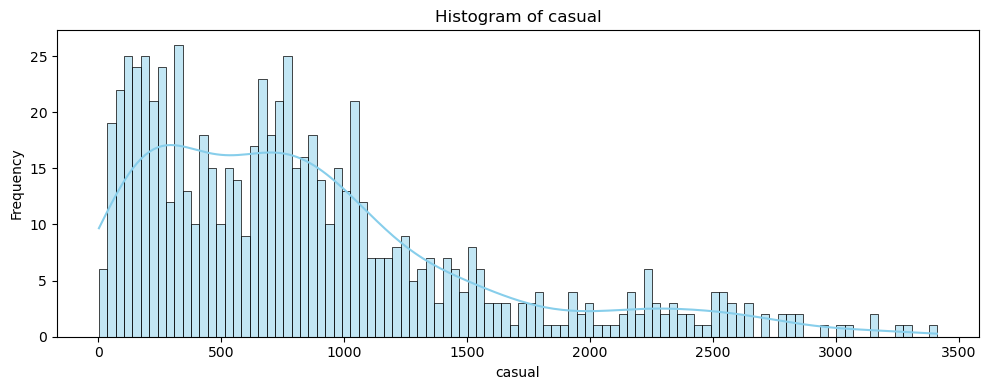

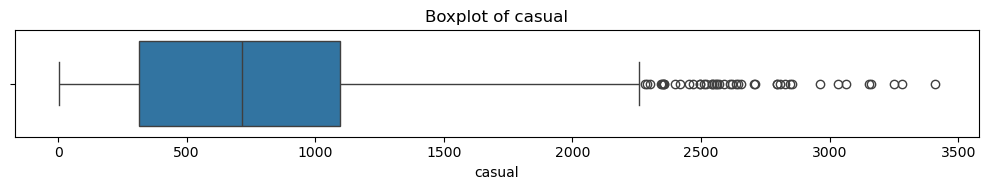

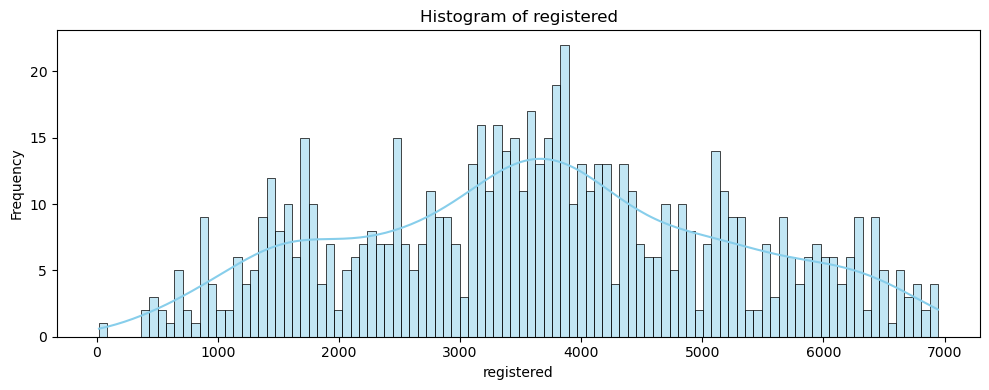

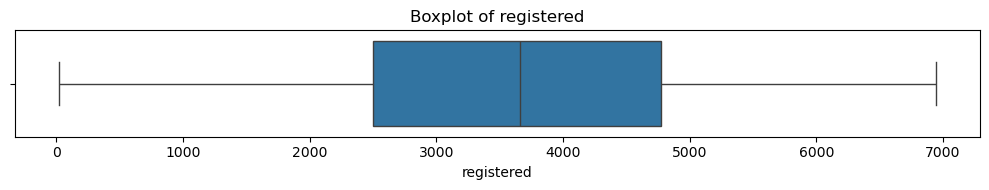

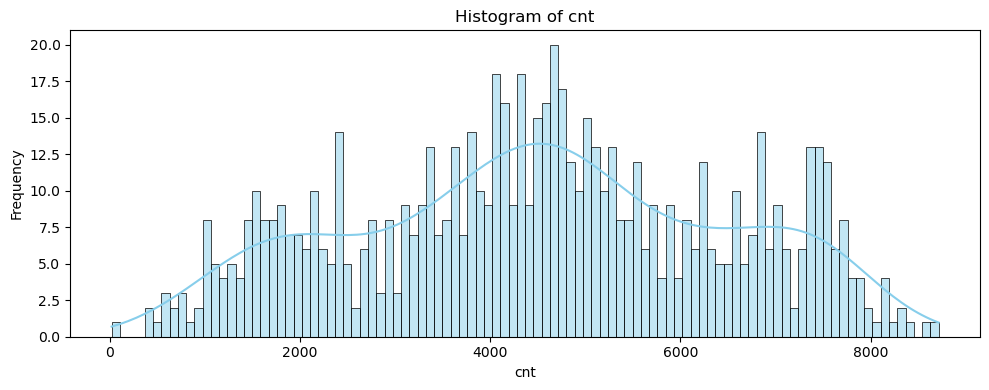

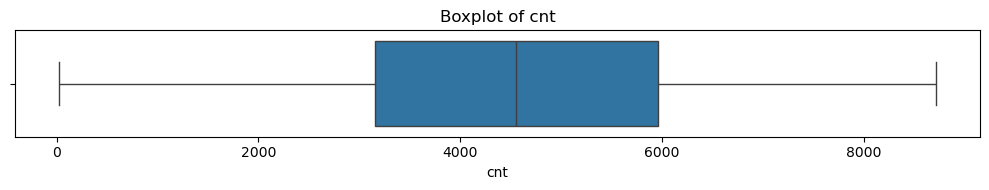

In [68]:
for col in df_day_class.columns:
    hist(df_day_class, col)
    box(df_day_class, col)

- Pada kolom casual, penyebaran data cenderung right skew, dan terlihat beberapa outlier.
- Pada kolom registered dan cnt, penyebaran data cenderung terpusat seperti t-student, dan tidak terlihat outlier.

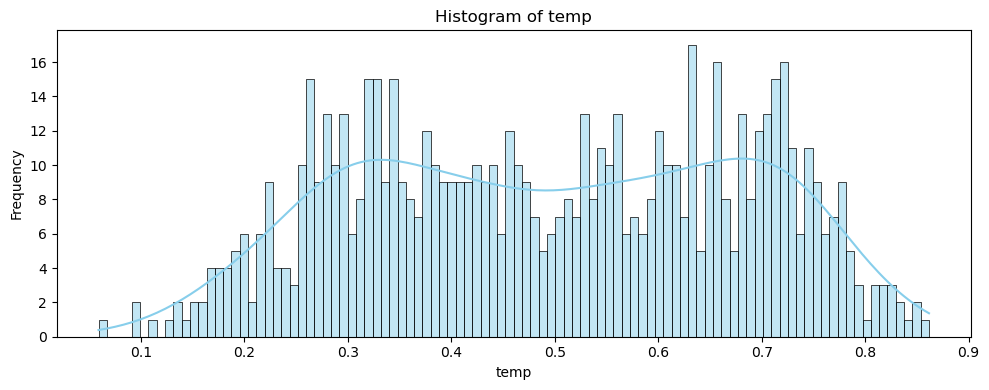

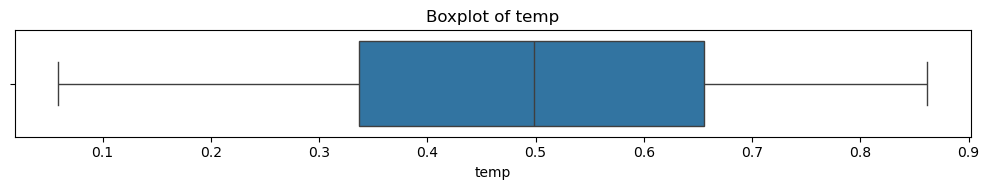

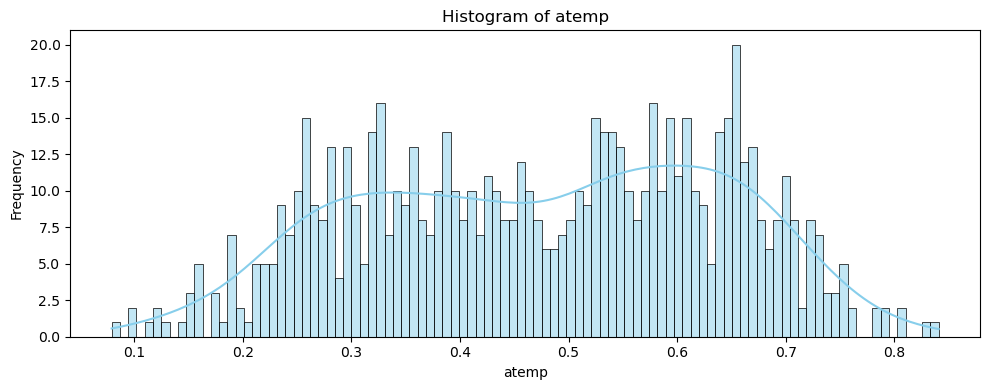

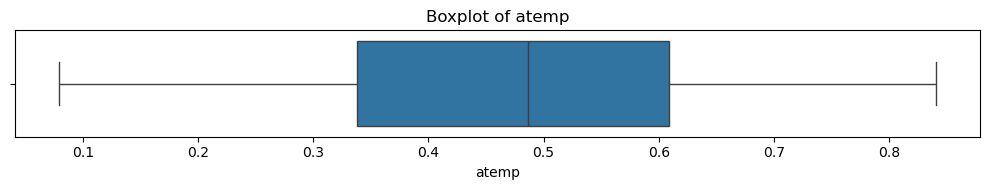

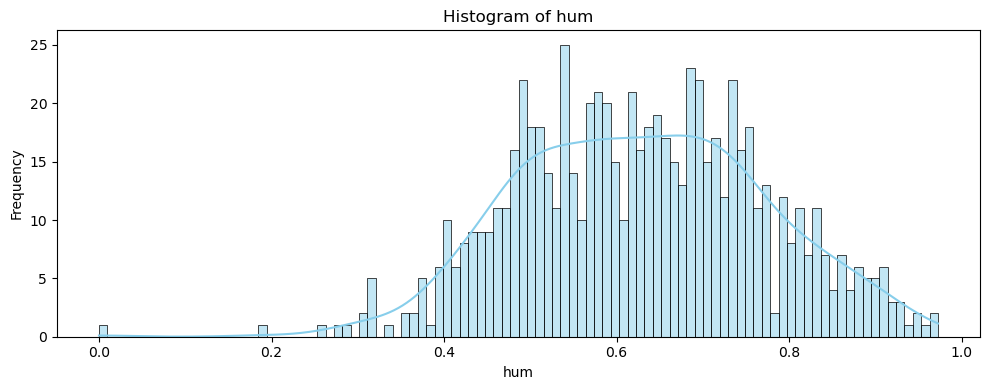

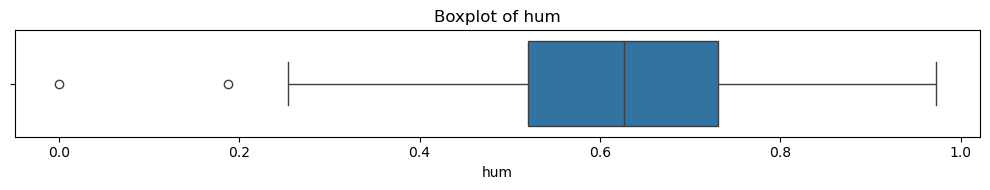

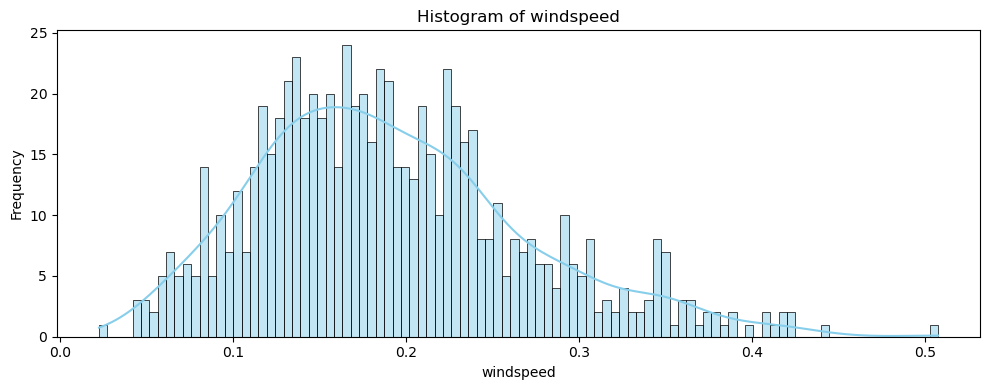

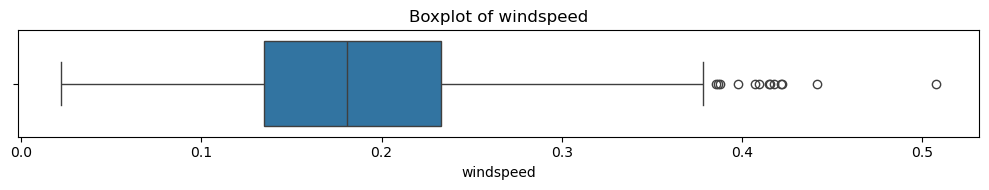

In [69]:
for col in df_day_cont.columns:
    hist(df_day_cont, col)
    box(df_day_cont, col)

- Pada kolom temp dan atemp, penyebaran data cenderung landai, dan tidak terlihat outlier.
- Pada kolom casual, penyebaran data cenderung left skew, dan terlihat beberapa outlier.
- Pada kolom casual, penyebaran data cenderung right skew, dan terlihat beberapa outlier.

In [70]:
df_temp_season = df_day.groupby(['season', 'weathersit'], observed=True).agg({
    'temp': 'mean',
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean',
}).reset_index()
df_temp_season.head()

,season,weathersit,temp,atemp,hum,windspeed
0,Fall,Clear,0.720862,0.667923,0.589422,0.170204
1,Fall,Light_rainsnow,0.592228,0.541176,0.902255,0.211753
2,Fall,Misty,0.674583,0.631390,0.735920,0.174148
3,Spring,Clear,0.301221,0.298793,0.514689,0.225780
4,Spring,Light_rainsnow,0.268523,0.255117,0.604271,0.290517


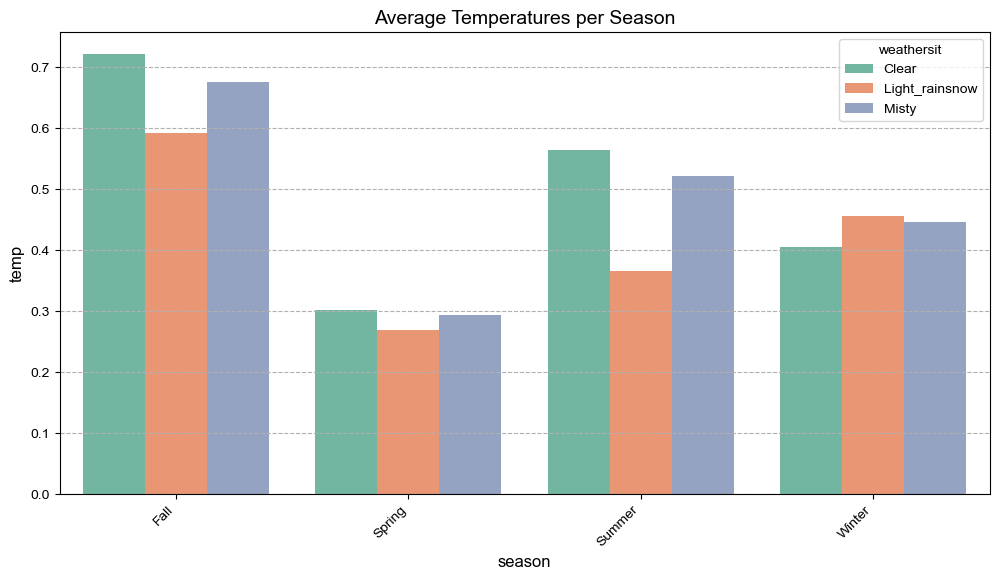

In [71]:
bar_plan_comparison(df_temp_season, x='season', y='temp', hue='weathersit', title='Average Temperatures per Season')

Perbandingan suhu terhadap musim.

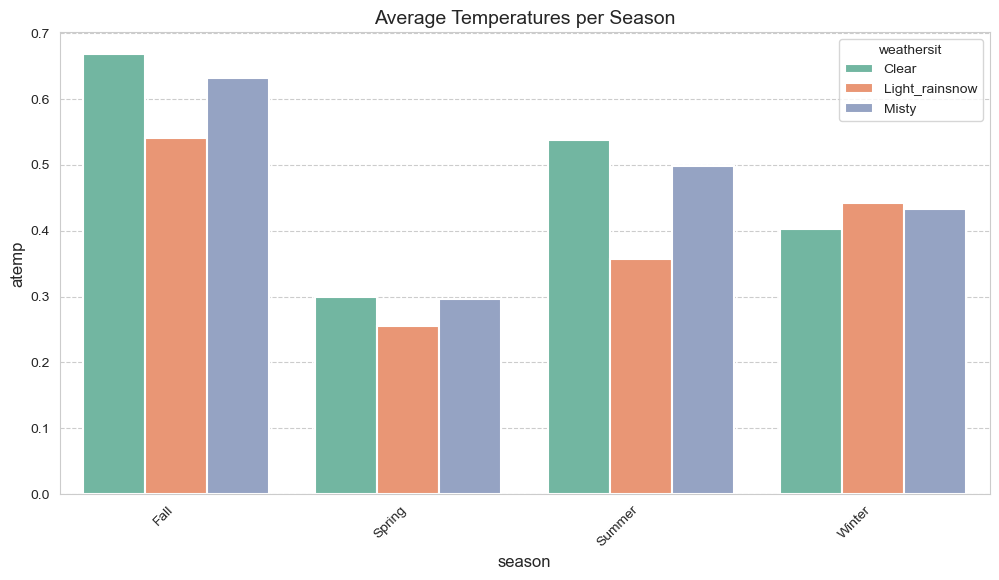

In [72]:
bar_plan_comparison(df_temp_season, x='season', y='atemp', hue='weathersit', title='Average Temperatures per Season')

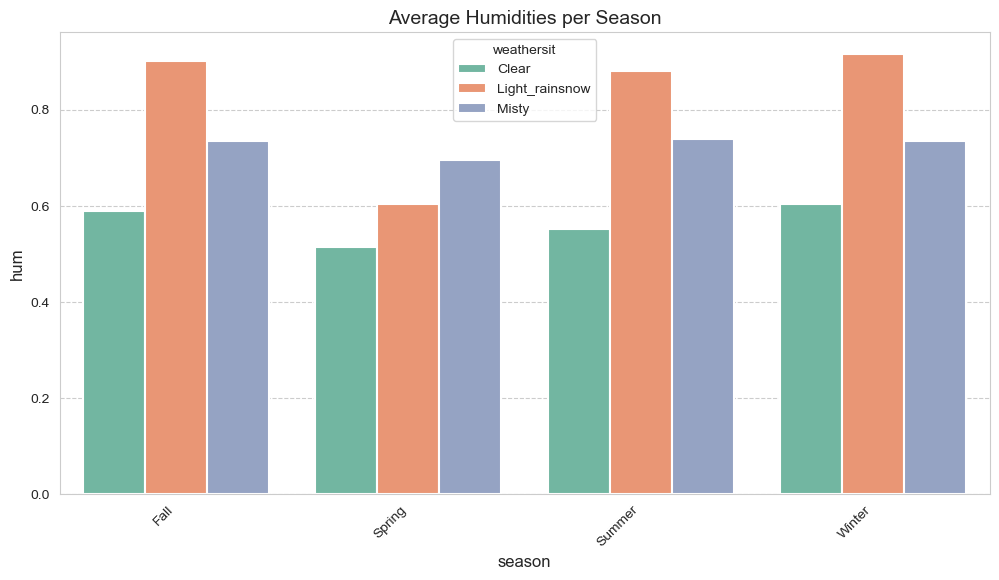

In [73]:
bar_plan_comparison(df_temp_season, x='season', y='hum', hue='weathersit', title='Average Humidities per Season')

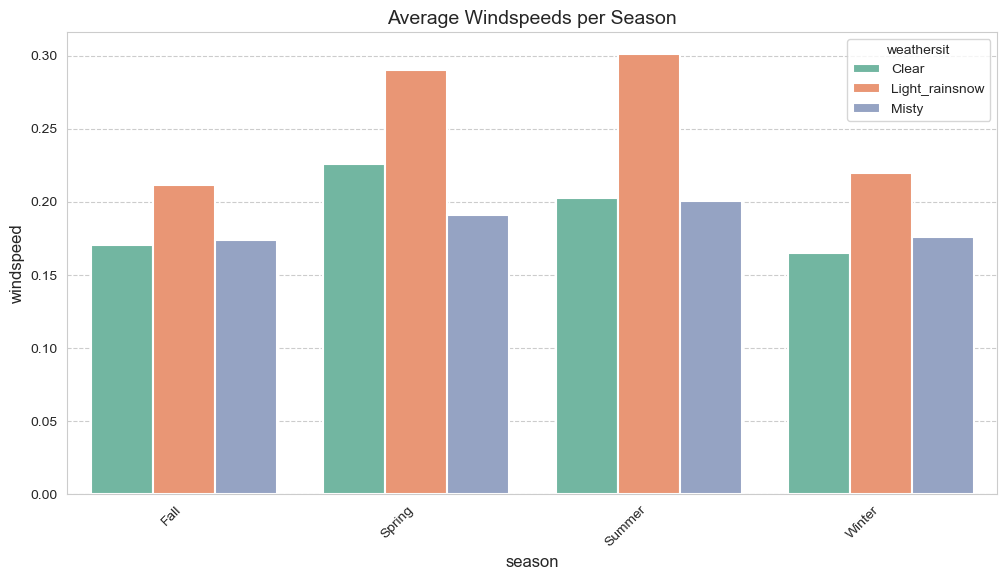

In [74]:
bar_plan_comparison(df_temp_season, x='season', y='windspeed', hue='weathersit', title='Average Windspeeds per Season')

Perbandingan suhu terhadap situasi cuaca. Jenis cuaca cenderung merata pada setiap musim.

In [75]:
df_temp_season_melt = pd.melt(df_temp_season,
                                      id_vars=['season'],
                                      value_vars=['temp', 'atemp', 'hum', 'windspeed'],
                                      var_name='status',
                                      value_name='value')
df_temp_season_melt.head()

,season,status,value
0,Fall,temp,0.720862
1,Fall,temp,0.592228
2,Fall,temp,0.674583
3,Spring,temp,0.301221
4,Spring,temp,0.268523


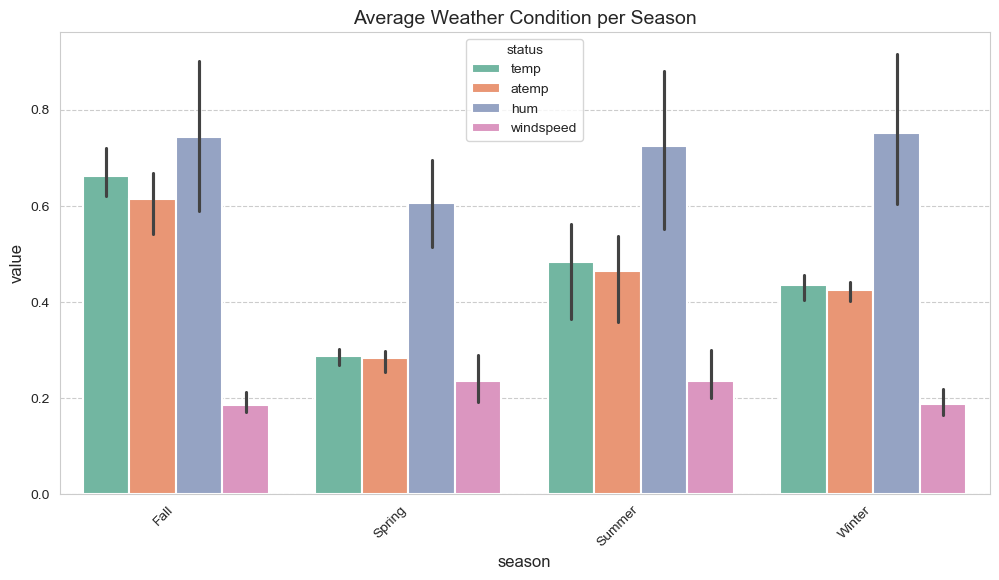

In [76]:
bar_plan_comparison(df_temp_season_melt, x='season', y='value', hue='status', title='Average Weather Condition per Season')

Pada perbandingan suhu, kelembapan dan kecepatan angin setiap musimnya, terdapat beberapa perbedaan. Humidity terlihat merata sepanjang tahun. Suhu cenderung berubah mengikuti musim. Kecepatan angin cenderung rendah sepanjang musim.

In [77]:
cross_day_weather = pd.crosstab(df_hour['weathersit'], df_day['season'])
cross_day_weather

season,Fall,Spring,Summer,Winter
weathersit,,,,
Clear,99,92,126,103
Heavy_rainsnow,1,0,0,0
Light_rainsnow,25,15,7,16
Misty,63,74,51,59


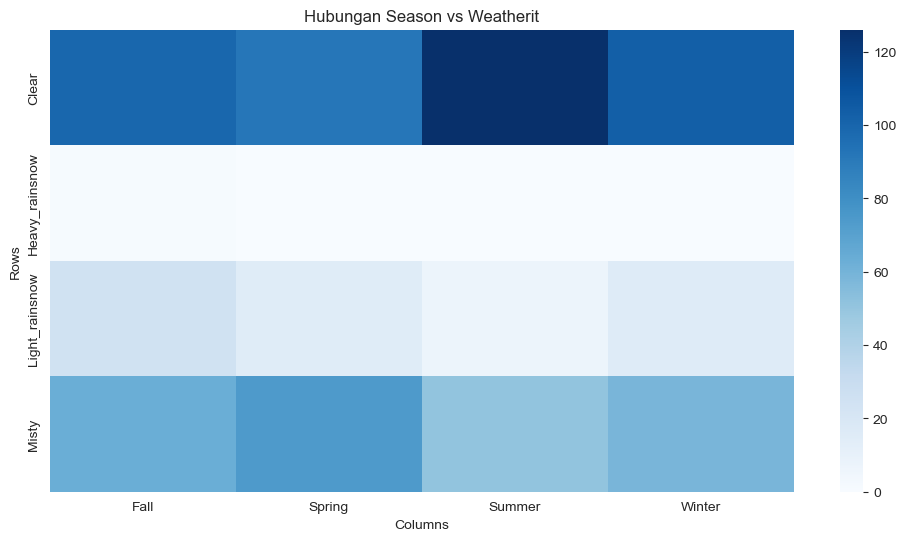

In [78]:
plt.figure(figsize=(12, 6))
sns.heatmap(cross_day_weather, cmap='Blues')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Hubungan Season vs Weatherit')
plt.show()

- Clear (cerah / berawan sedikit) → paling sering muncul di semua musim, terutama Fall (3280 hari).

- Heavy_rainsnow (hujan/salju berat) → sangat jarang, hanya muncul 3 hari di Spring, dan tidak ada di musim lain.

- Light_rainsnow (hujan/salju ringan) → relatif sedikit dibanding Clear, tetapi ada di semua musim. Summer 406 hari paling banyak.

- Misty (kabut / berawan / ringan) → cukup banyak di semua musim, terutama Winter 1248 hari.

#### Explore Data df_hour

In [79]:
df_hour_class = df_hour[['casual', 'registered', 'cnt']]

In [80]:
df_hour_cont = df_hour[['temp', 'atemp', 'hum', 'windspeed']]

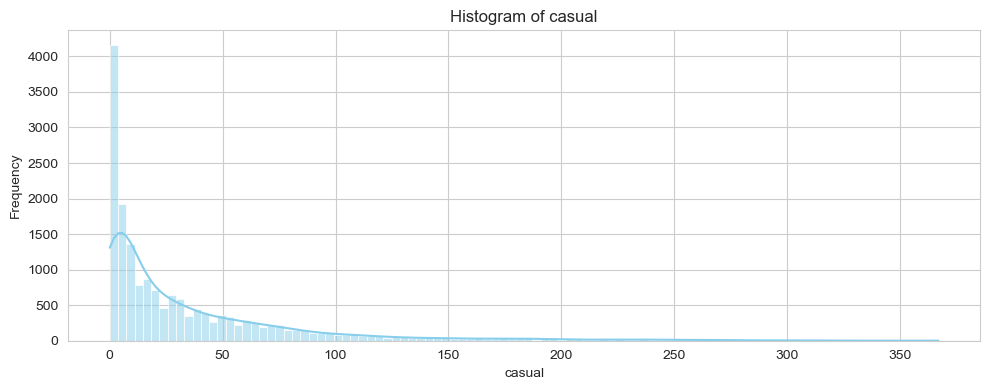

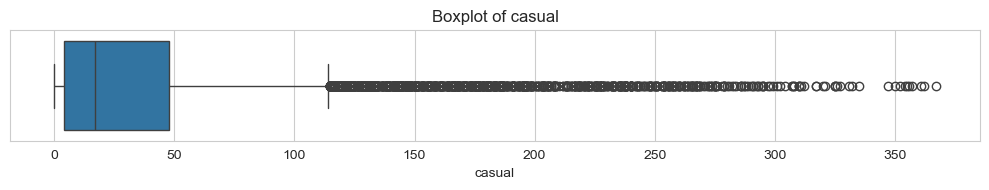

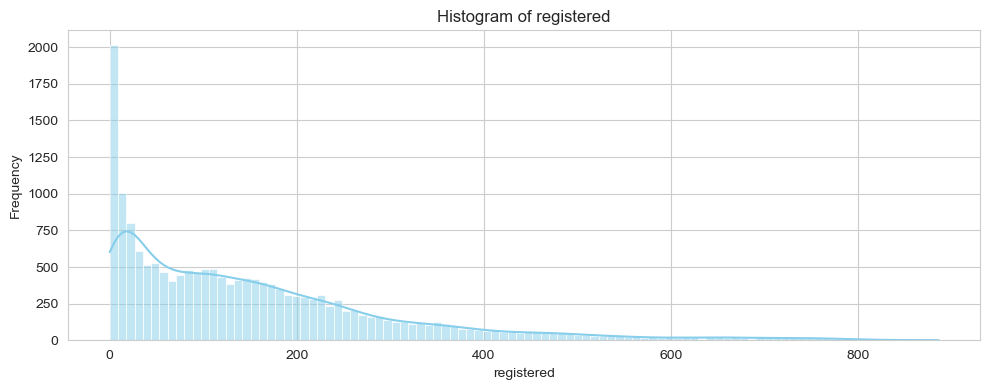

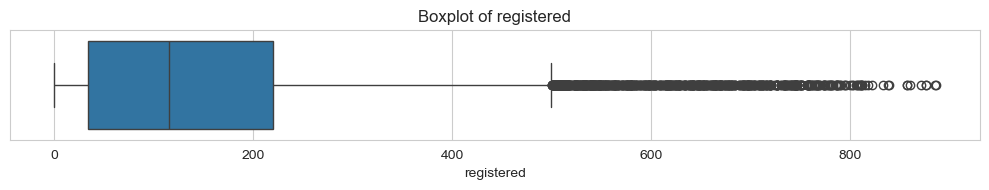

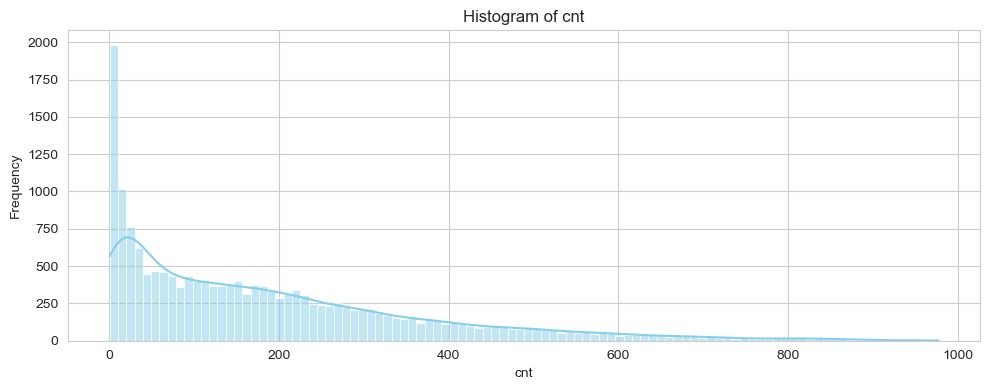

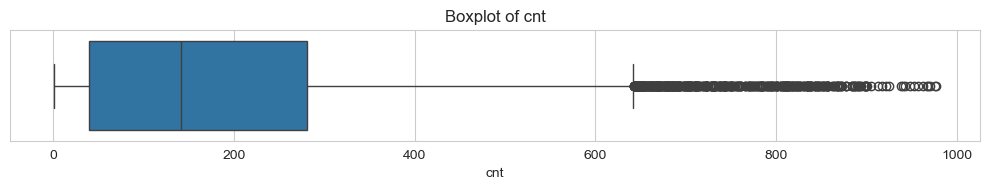

In [81]:
for col in df_hour_class.columns:
    hist(df_hour_class, col)
    box(df_hour_class, col)

- Pada kolom casual, registered, dan cnt, penyebaran data cenderung right skew, dan terlihat beberapa outlier.

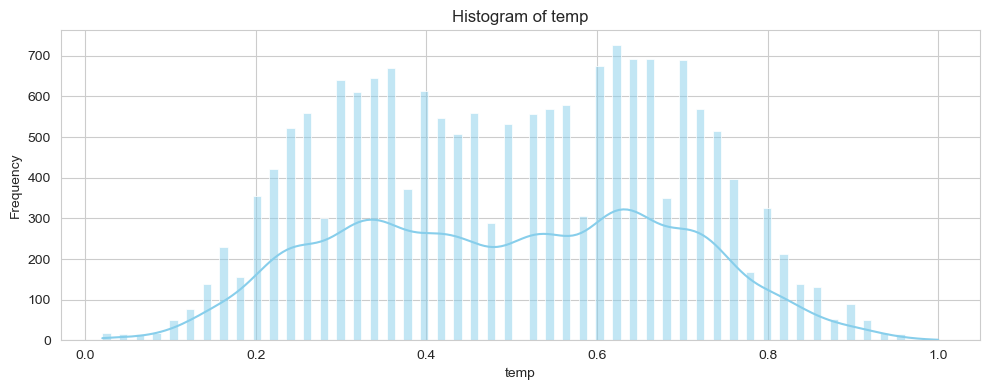

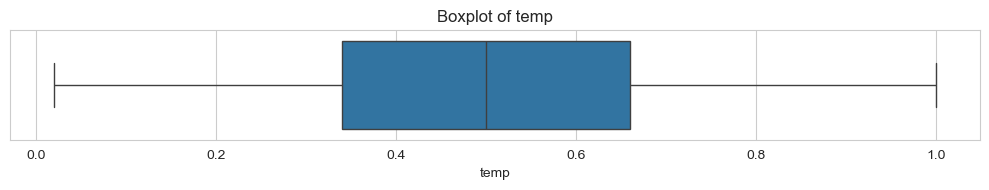

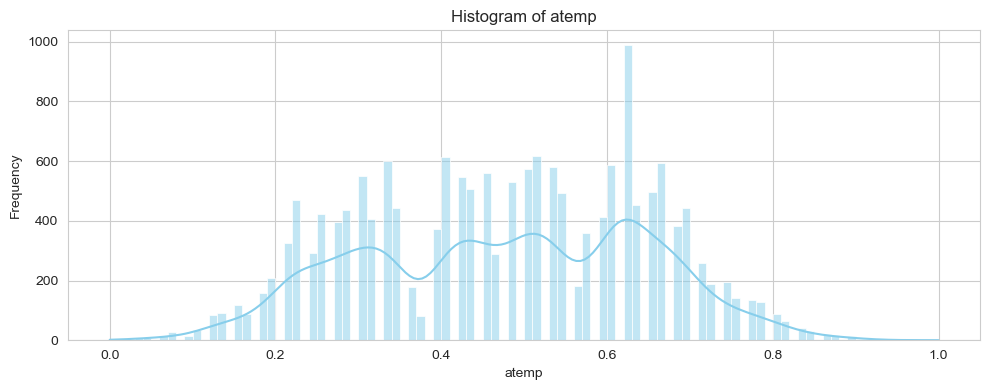

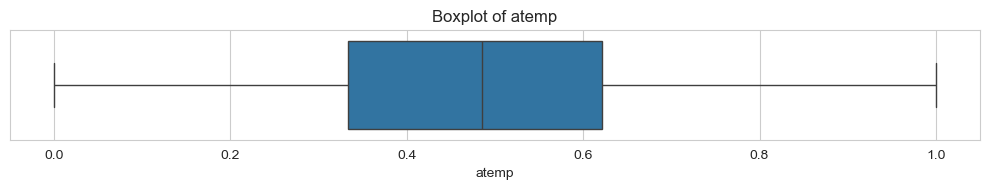

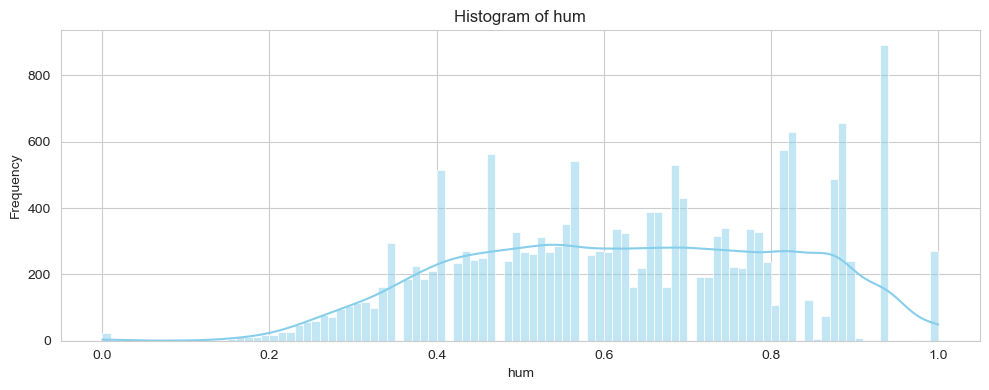

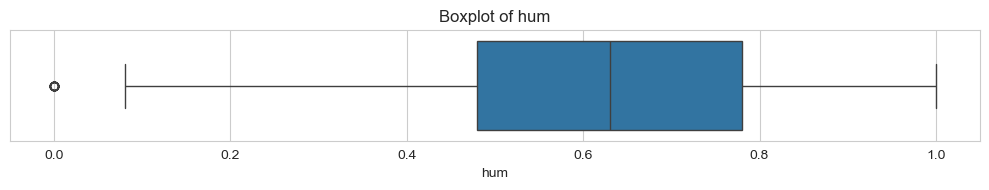

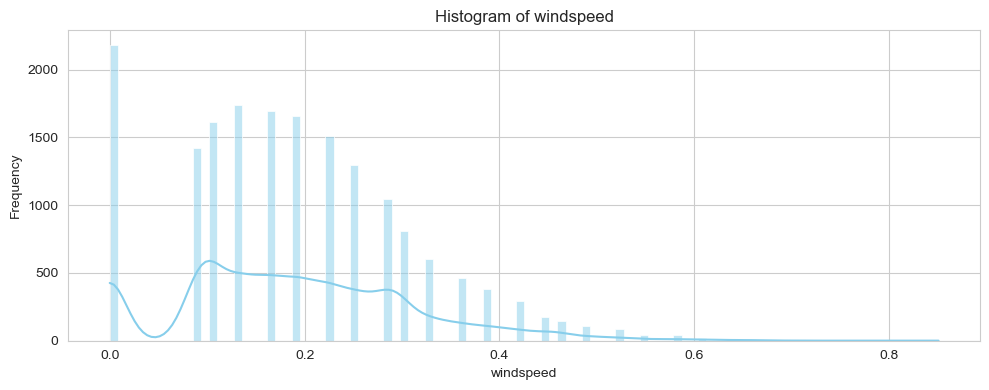

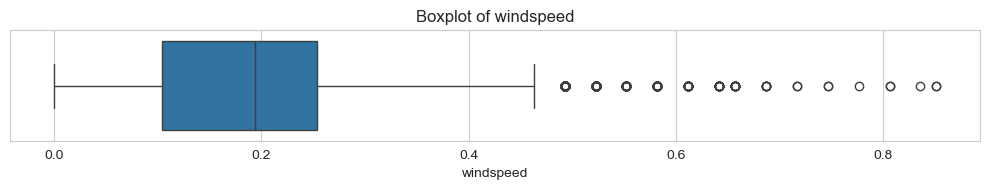

In [82]:
for col in df_hour_cont.columns:
    hist(df_hour_cont, col)
    box(df_hour_cont, col)

- Pada kolom temp dan atemp, penyebaran data cenderung landai, dan tidak terlihat outlier.
- Pada kolom casual, penyebaran data cenderung left skew, dan terlihat beberapa outlier.
- Pada kolom casual, penyebaran data cenderung right skew, dan terlihat beberapa outlier.

**Insight:**
- Pada beberapa kolom masih terdapat outlier dan skew pada penyebaran datanya.
- Pada anaisis data ini, kita tidak menghapus outlier agar bisa melihat data secara menyeluruh.
- Suhu cenderung berubah mengikuti musim, sementara kelembapan dan kecepatan angin tidak terlalu berpengaruh.
- Sepanjang musim cuacaenderung cerah, dan berawan, Dengan hujan salju ringan yang relatif jarang.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Bagaimana tren penyewaan sepeda sepanjang tahun? Apakah ada pola musiman?

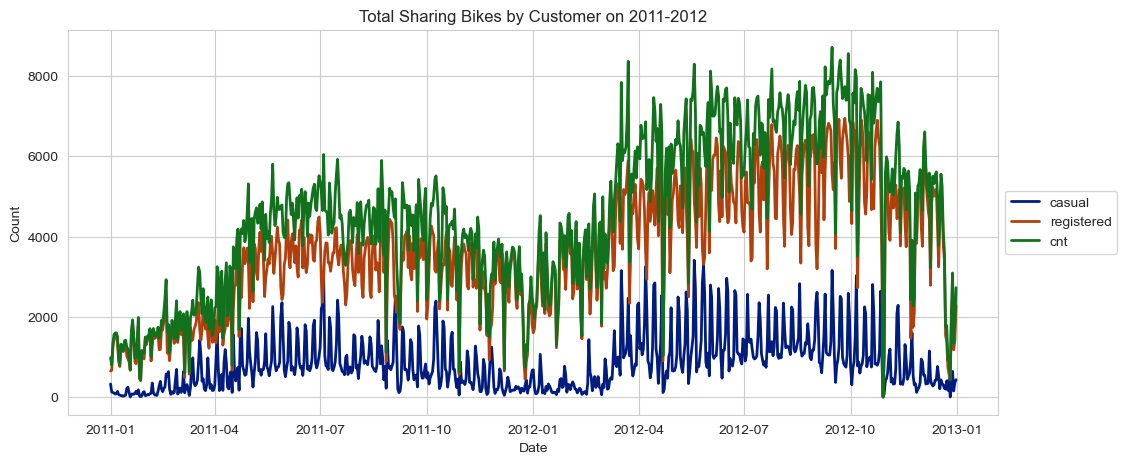

In [83]:
df_cust_month = df_day.groupby(['dteday'], observed=True).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

df_cust_month_melt = pd.melt(df_cust_month,
                                      id_vars=['dteday'],
                                      value_vars=['casual', 'registered', 'cnt'],
                                      var_name='status',
                                      value_name='count')

# Set the figure size
plt.figure(figsize=(12, 5))

# Create a line plot with hue and custom color range
sns.lineplot(data=df_cust_month_melt, x='dteday', y='count', linewidth=2, hue='status', palette='dark')

# Set axis labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total Sharing Bikes by Customer on 2011-2012')

# Adjust legend position
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Show the plot
plt.show()



Dari grafik diatas, dapat disimpulkan bahwa tren penyewaan sepeda meningkat pada sekitar bulan maret hingga oktober setiap tahunnya.

In [84]:
df_cust_season = df_day.groupby(['season'], observed=True).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
df_cust_season

,season,casual,registered,cnt
0,Fall,226091,835038,1061129
1,Spring,60622,410726,471348
2,Summer,203522,715067,918589
3,Winter,129782,711831,841613


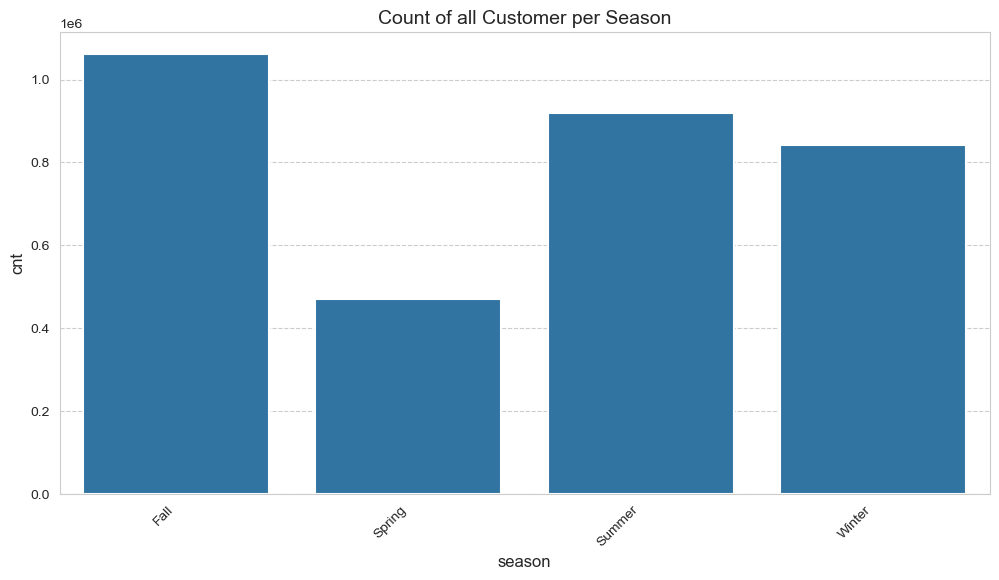

In [85]:
bar_plan_comparison(df_cust_season, x='season', y='cnt', hue=None, palette=None,  title='Count of all Customer per Season')

Dilihat dari data diatas, customer pada musim gugur cenderung lebih banyak dan customer pada musim semi cenderung lebih sedikit.

In [86]:
df_cust_season_melt = pd.melt(df_cust_season,
                                      id_vars=['season'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

df_cust_season_melt

,season,status,count
0,Fall,casual,226091
1,Spring,casual,60622
2,Summer,casual,203522
3,Winter,casual,129782
4,Fall,registered,835038
5,Spring,registered,410726
6,Summer,registered,715067
7,Winter,registered,711831


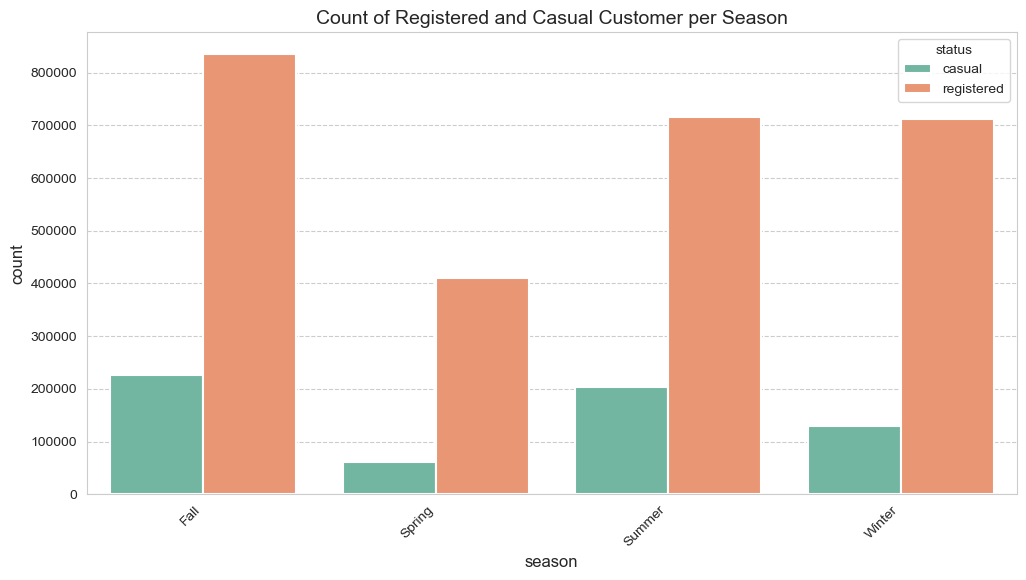

In [87]:
bar_plan_comparison(df_cust_season_melt, x='season', y='count', hue='status', title='Count of Registered and Casual Customer per Season')

Dari grafik diatas, dapat disimpulkanbahwa customer casual ataupun registered memiliki pola musiman yang mirip.

In [88]:
pd.crosstab(df_day['month'], df_day['season'])

season,Fall,Spring,Summer,Winter
month,,,,
1,0,62,0,0
2,0,57,0,0
3,0,40,22,0
4,0,0,60,0
5,0,0,62,0
6,20,0,40,0
7,62,0,0,0
8,62,0,0,0
9,44,0,0,16


- Spring = Q1
- Summer = Q2
- Fall = Q3
- Winter = Q4


**Insight:**
- Jumlah penyewa sepeda meningkat hampir 2x lipat pada tahun 2012.
- Tren penyewaan sepeda cenderung naik pada bulan maret hingga oktober yaitu sekitar musim panas hingga musim gugur (Q2-Q3).

### Pertanyaan 2:

- Pada jam berapa permintaan sepeda paling tinggi? Apakah berbeda antara hari kerja dan akhir pekan?

In [89]:
df_cust_hour = df_hour.groupby(['hr'], observed=True).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
df_cust_hour.head()

,hr,casual,registered,cnt
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428


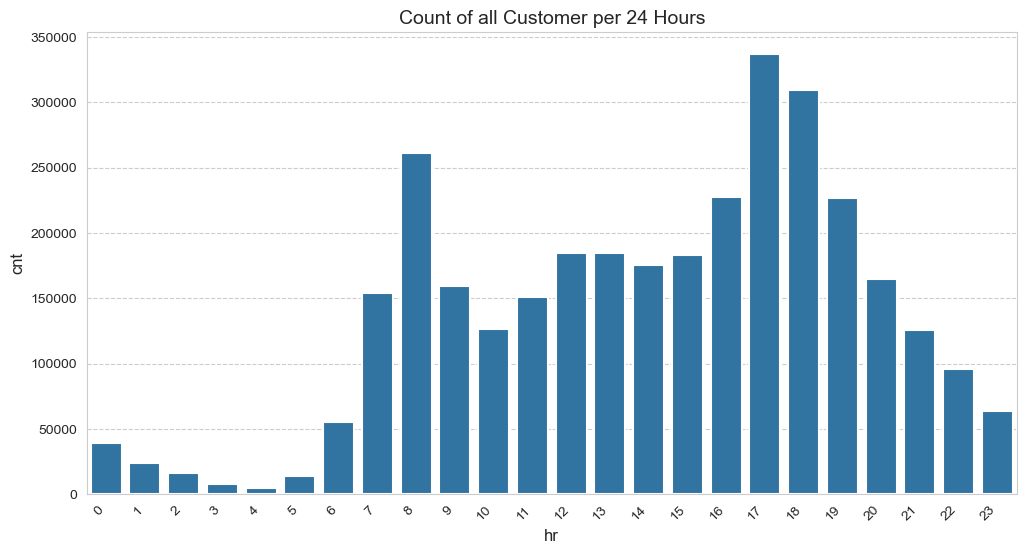

In [90]:
bar_plan_comparison(df_cust_hour, x='hr', y='cnt', hue=None, palette=None,  title='Count of all Customer per 24 Hours')

Penyewaan sepeda paling tinggi terdapat pada jam 17:00.

In [91]:
df_cust_hour_melt = pd.melt(df_cust_hour,
                                      id_vars=['hr'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

df_cust_hour_melt.head()

,hr,status,count
0,0,casual,7375
1,1,casual,4709
2,2,casual,3412
3,3,casual,1893
4,4,casual,874


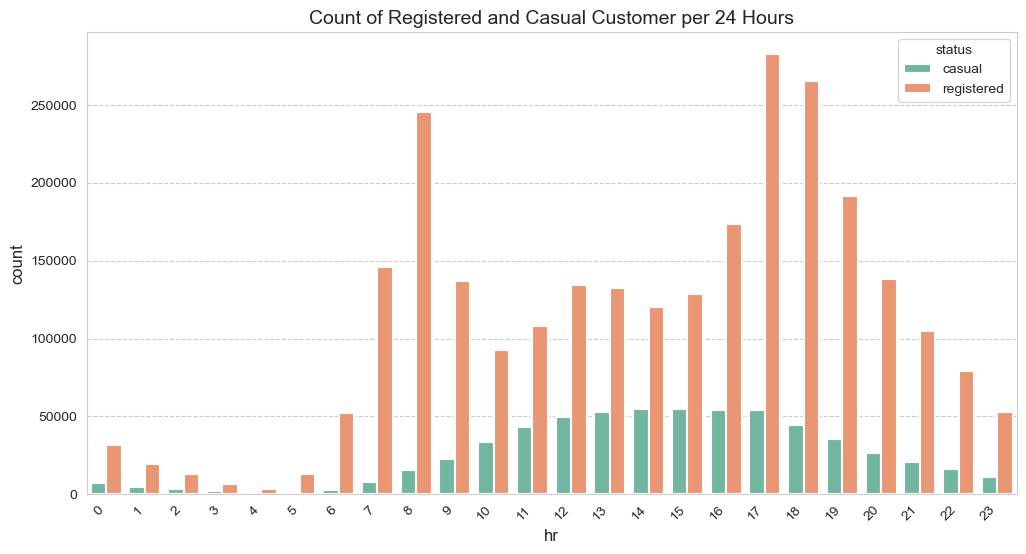

In [92]:
bar_plan_comparison(df_cust_hour_melt, x='hr', y='count', hue='status', title='Count of Registered and Casual Customer per 24 Hours')

Perbedaan pola penyewaan sepeda pada customer casual dan registered dalam 24 jam jam terlihat cukup signifikan. Customer kasual meningkat pada siang hari sekitar 10:00 hingga 15:00. Customer registered meningkat pada jam berangkat dan pulang kerja.

In [93]:
df_cust_days = df_hour.groupby(['hr', 'category_days'], observed=True).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
df_cust_days.head()


,hr,category_days,casual,registered,cnt
0,0,weekdays,3850,15603,19453
1,0,weekend,3525,16152,19677
2,1,weekdays,2024,6970,8994
3,1,weekend,2685,12485,15170
4,2,weekdays,1206,3558,4764


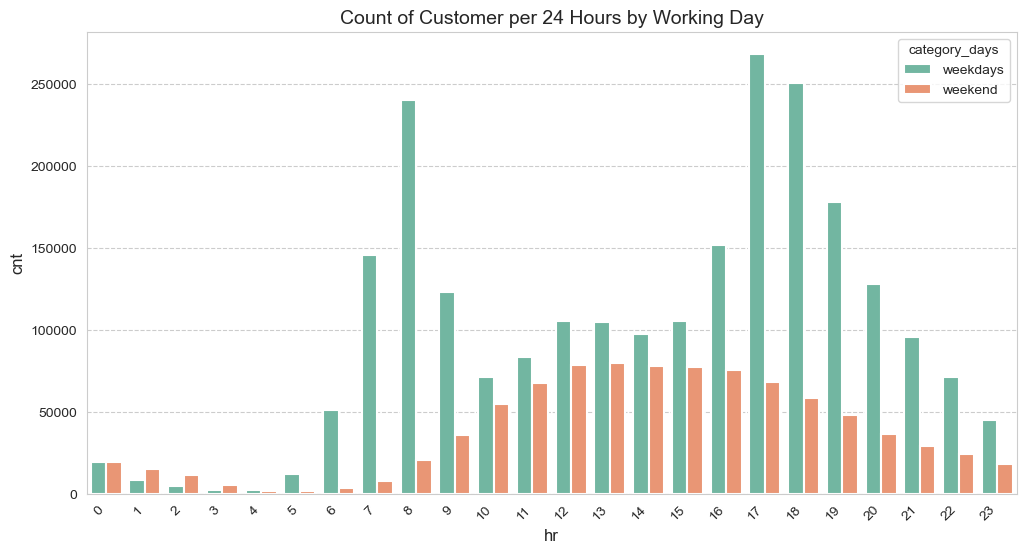

In [94]:
bar_plan_comparison(df_cust_days, x='hr', y='cnt', hue='category_days', title='Count of Customer per 24 Hours by Working Day')

Pada hari kerja, tingkat penyewaan meningkat pada jam berangkat dan pulang kerja. Sementara, pada akhir pekan penyewaan meningkat pada siang hari sekitar 10:00 hingga 15:00.

**Insight:**
- Jumlah penyewaan sepeda paling tinggi, terdapat pada jam 17:00.
- Jumlah penyewaan sepeda paling tinggi antara customer registered dan casual berbeda. Pada customer registered penyewaan tertinggi pada jam 17:00, sementara pada customer casual penyewaan tertinggi pada jam 13:00.
- Jumlah penyewaan sepeda paling tinggi antara hari kerja dan akhir pekan berbada. Pada hari kerja penyewaan tertinggi pada jam 17:00, sementara pada akhir pekan penyewaan tertinggi pada jam 13:00.

## Analisis Lanjutan (Opsional)

### Pertanyaan 3:

- Apakah pengaruh cuaca menyebabkan penurunan dalam penyewaan?

Berikut deskripsi cuaca pada kolom weathersit:

| Kode  | Keterangan              | Deskripsi cuaca                                                  |
| ----- | ----------------------- | ---------------------------------------------------------------- |
| **1** | Clear / Few clouds      | Cerah, berawan sebagian, langit sebagian tertutup awan           |
| **2** | Mist + Cloudy           | Berkabut, berawan, atau sedikit hujan ringan                     |
| **3** | Light Snow / Light Rain | Salju ringan, hujan ringan, atau badai petir ringan              |
| **4** | Heavy Rain / Snow       | Hujan lebat, salju lebat, badai besar (jarang muncul di dataset) |


In [95]:
df_cnt_weather = df_hour.groupby(['season', 'weathersit'], observed=True).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()
df_cnt_weather.head()


,season,weathersit,casual,registered,cnt
0,Fall,Clear,174014,627927,801941
1,Fall,Light_rainsnow,9727,36529,46256
2,Fall,Misty,42350,170582,212932
3,Spring,Clear,44462,280816,325278
4,Spring,Heavy_rainsnow,8,215,223


- Spring = Q1
- Summer = Q2
- Fall = Q3
- Winter = Q4


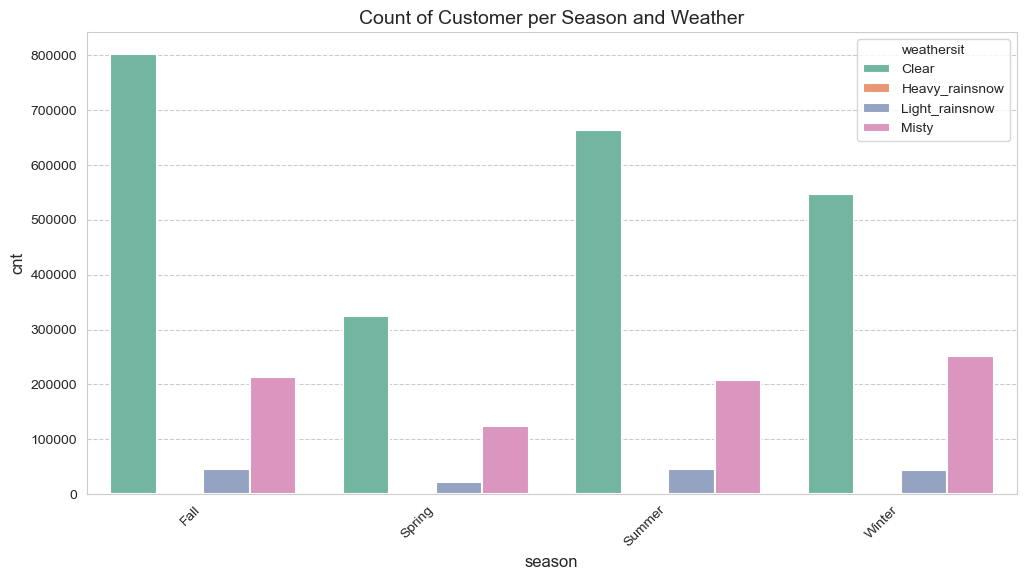

In [96]:
bar_plan_comparison(df_cnt_weather, x='season', y='cnt', hue='weathersit', title='Count of Customer per Season and Weather')

Dari grafik diatas dapat terlihat bahwa pada cuaca cerah jumlah customer meningkat signifikan, sedangkan saat berkabut jumlahnya tidak sampai setengahnya. Pada cuaca hujan ringan masih ada beberapa customer yang menyewa sepeda, sementara pada cuaca hujan lebat tidak ada customer yang menyewa sepeda.

RFM Analysis dibawah ini digunakan untuk memahami perilaku customer dari tiga faktor utama:
- Recency (seberapa baru pelanggan berinteraksi dengan bisnis)
- Frequency (banyaknya pelanggan dalam berinteraksi)
- Monetary (banyaknya uang yang mereka gunakan)

In [115]:
df_day.head()

,instant,dteday,season,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day,day_name,week,category_days
0,1,2011-01-01,Spring,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985,2011,1,1,Saturday,52,weekend
1,2,2011-01-02,Spring,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801,2011,1,2,Sunday,52,weekend
2,3,2011-01-03,Spring,0,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011,1,3,Monday,1,weekdays
3,4,2011-01-04,Spring,0,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011,1,4,Tuesday,1,weekdays
4,5,2011-01-05,Spring,0,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011,1,5,Wednesday,1,weekdays


In [118]:
latest_date = df_day['dteday'].max()

df_rfm = (
    df_day.groupby('month', as_index=False)
    .agg(
        recency=('dteday', lambda x: (latest_date - x.max()).days),
        frequency=('cnt', 'count'),
        monetary=('cnt', 'sum')
    )
)

df_rfm

,month,recency,frequency,monetary
0,1,335,62,134933
1,2,306,57,151352
2,3,275,62,228920
3,4,245,60,269094
4,5,214,62,331686
5,6,184,60,346342
6,7,153,62,344948
7,8,122,62,351194
8,9,92,60,345991
9,10,61,62,322352


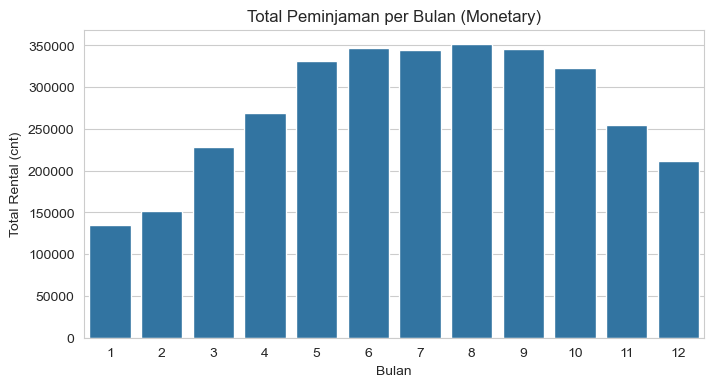

In [120]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_rfm, x='month', y='monetary')
plt.title('Total Peminjaman per Bulan (Monetary)')
plt.xlabel('Bulan')
plt.ylabel('Total Rental (cnt)')
plt.show()


- Aktivitas penyewaan sepeda meningkat secara signifikan pada pertengahan tahun (Mei–Agustus), yang biasanya bertepatan dengan musim panas dan cuaca cerah.
- Frekuensi peminjaman harian relatif stabil, menunjukkan minat penyewaan sepeda konsisten sepanjang tahun.
- Penurunan monetary pada akhir tahun (Oktober–Desember) kemungkinan disebabkan oleh cuaca dingin atau musim hujan, yang menurunkan minat pengguna.
- Berdasarkan RFM, periode Agustus–September adalah periode paling aktif dan menguntungkan, sedangkan Januari–Februari adalah periode dengan performa terendah.

## Conclusion

- Tren penyewaanepeda sepanjang tahun cendenrung naik dari tahun ke tahun, terutama pada Q2-Q3 mengikuti pola musiman.
- Jumlah penyewaan sepeda paling tinggi pada jam 17:00 pada hari kerja, dan jam 13:00 pada akhir pekan.
- Jumlah penyewaan sepeda tertinggi setiap musimnyaelalu terjadi pada cuaca cerah. Sedangkan pada cuaca berkabut dan hujan ringan, jumlah penyewaan sepeda berkurang drastis.